In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("./heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Finding the optimal K
error_rates = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, preds)
    error_rates.append(error)

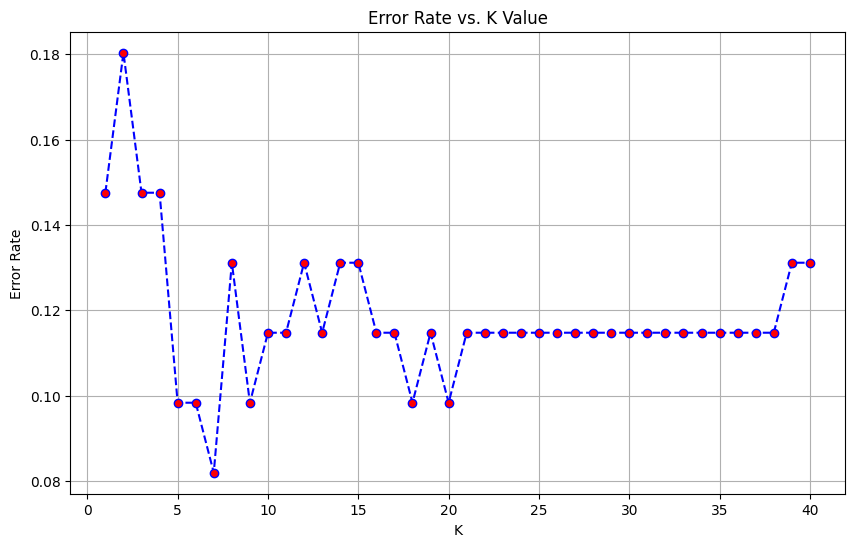

In [9]:
# Plotting error rate vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [10]:
# Best K
optimal_k = k_values[error_rates.index(min(error_rates))]
print(f"Optimal K value: {optimal_k}")

Optimal K value: 7


In [14]:
# Train final model
final_knn = KNeighborsClassifier(n_neighbors=optimal_k,metric='euclidean',p=2)
final_knn.fit(X_train_scaled, y_train)
final_preds = final_knn.predict(X_test_scaled)

In [15]:
# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y_test, final_preds)
accuracy = accuracy_score(y_test, final_preds)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[27  2]
 [ 3 29]]
Accuracy: 0.9180
